In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

Defining a simple multi-armed-bandit as follows

In [1]:
def multiArmedBandit(k):
    if k == 0:
        return 2*np.random.randn()+1
    elif k == 1:
        return np.random.randn()+2
    elif k == 2:
        return 3*np.random.randn()
    elif k == 3:
        return np.random.uniform(-5,5)
    else:
        return None 

Arm 1 has the largest expected value of reward which is equal to 2. Hence, the optimal value v* is equal to 2. This value will be used to compute the regret. Also we have 

* q(0) = 1    =>  regret = 1 
* q(1) = 2    =>  regret = 0 
* q(2) = 0    =>  regret = 2 
* q(3) = 0    =>  regret = 2 

This is a plot of the distribution of different arms

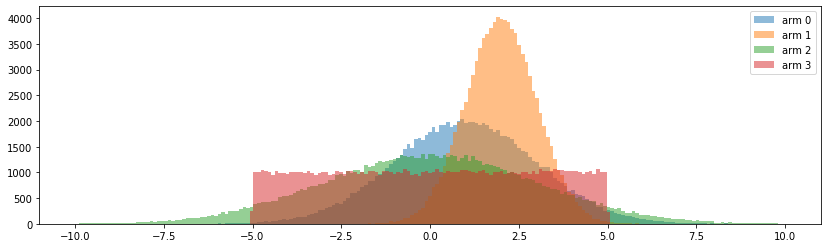

In [3]:
N = 100000 
arm0 = [multiArmedBandit(0) for _ in range(N)]
arm1 = [multiArmedBandit(1) for _ in range(N)]
arm2 = [multiArmedBandit(2) for _ in range(N)]
arm3 = [multiArmedBandit(3) for _ in range(N)]

bins = np.linspace(-10, 10, N/500)
plt.figure(figsize=(14,4))
plt.hist(arm0, bins, alpha=0.5, label='arm 0')
plt.hist(arm1, bins, alpha=0.5, label='arm 1')
plt.hist(arm2, bins, alpha=0.5, label='arm 2')
plt.hist(arm3, bins, alpha=0.5, label='arm 3')
plt.legend(loc='upper right')
plt.show()

Implementation of the greedy approach

In [4]:
def full_exploitation(t):
    # Greedy approach: full exploitation and no exploration 
    A = [multiArmedBandit(i) for i in range(4)]
    max_idx = max(range(4), key=lambda i:A[i])
    #print("arm0 :{:.2f}  arm1 :{:.2f}  arm2 :{:.2f}  arm3 :{:.2f}\t ==> Selected Arm: {}".format(\
    #    A[0], A[1], A[2], A[3], max_idx))
    qa = [1, 0, 2, 2]
    regrets = [qa[max_idx]]*t
    return [multiArmedBandit(max_idx) for _ in range(t)], regrets, [max_idx]*t

Implementation of the UCB Algorithm

In [5]:
def ucb_algorithm(t):
    assert t>3, "t should be greater than the number of arms"
    counts = {i:[multiArmedBandit(i), 1] for i in range(4)}
    rewards = [counts[i][0] for i in counts]
    actions = [0,1,2,3]
    qa = [1, 0, 2, 2]
    regrets = [1, 0, 2, 2]
    
    for step in range(4, t):
        C = [counts[k][0] + math.sqrt(2*math.log(step)/counts[k][1]) for k in counts]
        action = max(range(4), key=lambda i:C[i])
        actions.append(action) 
        rewards.append(multiArmedBandit(action))
        counts[action][1] += 1
        counts[action][0] += (rewards[-1]-counts[action][0])/(counts[action][1])
        regrets.append(qa[action])
    
    return rewards, regrets, actions

Helper function to draw the regrets

In [6]:
def compute_list_cumulative(A):
    if len(A) < 1: 
        return []
    B = [A[0]]
    for i in range(1, len(A)):
        B.append(B[-1] + A[i])
    return B

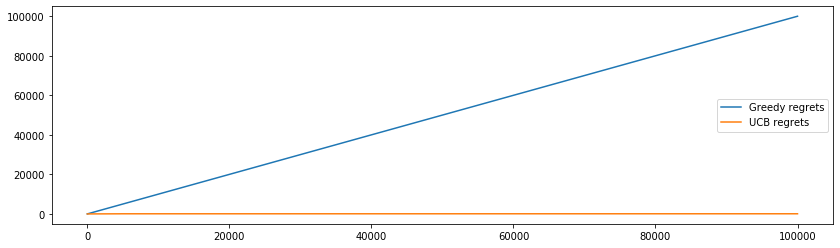

In [7]:
T = 100000
steps = list(range(1, T+1))
ucb_rewards, ucb_regrets, ucb_actions = ucb_algorithm(T)
greedy_rewards, greedy_regrets, greedy_actions = full_exploitation(T)
greedy_regrets_cumul = compute_list_cumulative(greedy_regrets)
ucb_regrets_cumul = compute_list_cumulative(ucb_regrets)

plt.figure(figsize=(14,4))
plt.plot(steps, greedy_regrets_cumul, label = 'Greedy regrets')
plt.plot(steps, ucb_regrets_cumul, label = 'UCB regrets')
plt.legend(loc='right')
plt.show()